In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sample Quiz Data.xlsx to Sample Quiz Data.xlsx


# **Q1. Channel performance evaluation (5 mins)**
Please prepare a summary report to evaluate the Ad performance per channel 

---

based on the campaign spending report. You may need to create the metrics that are commonly used in Ad performance evaluations, such as CTR, CAC, and etc.

**Dataset**: Q1_data

**Additional Questions**:  
1.   Make a recommendation on what channel we should focus the most effort on.
2.   Make a recommendation on a channel where we should decrease or eliminate our efforts.




▶ **Solution:**


In [3]:
df = pd.read_excel('Sample Quiz Data.xlsx',
              sheet_name='Q1_data') 

df.head()

,Ad ID,Channel,Impressions,Clicks (All),Amount Spent (USD),Installs
0,1,Facebook,26147,565,383.84,142
1,2,Google,9291,259,126.44,56
2,3,Instagram,2234,60,28.81,18
3,4,TikTok,1561,10,23.22,3
4,5,Google,24434,541,385.35,143


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ad ID               55 non-null     int64  
 1   Channel             55 non-null     object 
 2   Impressions         55 non-null     int64  
 3   Clicks (All)        55 non-null     int64  
 4   Amount Spent (USD)  55 non-null     float64
 5   Installs            55 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.7+ KB


Firstly, we define the metric for Ad performance evaluations, i.e., Clickthrough Rate (CTR)

In [6]:
df.groupby(['Channel']).sum().iloc[:,1:5]

,Impressions,Clicks (All),Amount Spent (USD),Installs
Channel,,,,
Facebook,145906,3260,2097.93,842
Google,180501,4178,2764.20,1422
Instagram,63878,1405,1004.26,495
TikTok,31563,653,475.78,200
Twitter,22013,438,367.38,158


In [7]:
df.groupby(['Channel']).sum().iloc[:,1:5].max()

Impressions           180501.0
Clicks (All)            4178.0
Amount Spent (USD)      2764.2
Installs                1422.0
dtype: float64

Hence, for the question Q1-1, the max results for all columns are shown above. Hence, **Google** is the channel that should focus the most effort on. I will recommend Kora to use Google in the future.

In [21]:
df.groupby(['Channel']).sum().iloc[:,1:5].min()

Impressions           22013.00
Clicks (All)            438.00
Amount Spent (USD)      367.38
Installs                158.00
dtype: float64

Similarly, for the question Q1-2, the min results for all columns are shown above. Hence, we should decrease or eliminate our efforts in the channel of **Twitter**.

# Q2. Logistic Regression Modeling (20 mins)

Please build a logistic regression model to help the team better understand how the user behaviors are correlated to the final conversion. 

By using the raw data provided as below, please (i) conduct a logistic regression analysis and (ii) quantitatively interpret how different independent variables impact the likelihood of conversion.



---



**Dataset**: Q2_data & Q2_variable_definition

**Additional Questions**: 
Make a recommendation to the Marketing Team on which marketing activity to prioritize (Landing Page, Marketing Email or Push Notification) if we want to 

3.   Make a recommendation to the Marketing Team on which marketing activity to prioritize (Landing Page, Marketing Email or Push Notification) if we want to maximize return visits. 
4.   Assume that developing a Landing Page takes 3 days to create; a Marketing Email 1 day to create and a Push Notification ½ day to create. 
Make a recommendation for a marketing work plan assuming we have 10 days of work available to plan for.



▶ **Solution:**


In [9]:
df1 = pd.read_excel('Sample Quiz Data.xlsx',
              sheet_name='Q2_data') 

In [10]:
df1.head()

,ID,Conversion,NotificationEnabled,lastEmailOpened,NumberLoginDays,NumberPageViews
0,1,0,0,0,1,4
1,2,1,1,0,3,46
2,3,1,1,0,4,32
3,4,0,1,0,1,24
4,5,0,0,0,1,15


For the Q2 - (i), we will conduct a logistic regression model using sklearn.

In [11]:
# split X and y into training and testing sets

y = df1['Conversion'] # Target variable
x = df1.drop('Conversion', axis = 1).drop('ID', axis = 1)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [14]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8484848484848485
Recall: 0.6511627906976745


In [16]:
corr = df1.corr()
corr

,ID,Conversion,NotificationEnabled,lastEmailOpened,NumberLoginDays,NumberPageViews
ID,1.000000,-0.047413,-0.104678,0.037287,-0.124258,-0.049966
Conversion,-0.047413,1.000000,0.570814,0.167324,0.331091,0.570771
NotificationEnabled,-0.104678,0.570814,1.000000,0.046028,0.239793,0.404016
lastEmailOpened,0.037287,0.167324,0.046028,1.000000,0.145674,0.202357
NumberLoginDays,-0.124258,0.331091,0.239793,0.145674,1.000000,0.800949
NumberPageViews,-0.049966,0.570771,0.404016,0.202357,0.800949,1.000000


Text(0.5, 1.0, 'Heatmap of the Correlation Matrix')

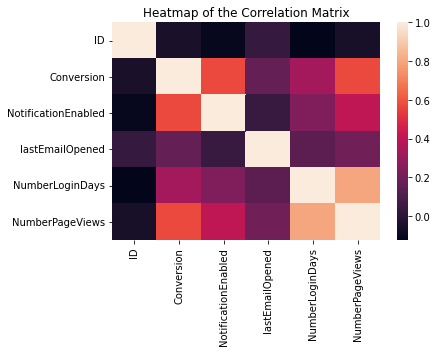

In [17]:
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')

According to the correlation parameters, we can quantitatively interpret how different independent variables impact the likelihood of conversion:

In [31]:
corr.iloc[1,2:]

NotificationEnabled    0.570814
lastEmailOpened        0.167324
NumberLoginDays        0.331091
NumberPageViews        0.570771
Name: Conversion, dtype: float64

If we want to maximize return visits, I will prioritize as below:

NotificationEnabled > NumberPageViews > NumberLoginDays > lastEmailOpened

For the Q2 - 3, we will suggest as:

Marketing Email < Landing Page < Push Notification

For the Q2 - 4, we will suggest as:

a Landing Page + a Marketing Email  + 12 push Notifications

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        82
           1       0.85      0.65      0.74        43

    accuracy                           0.84       125
   macro avg       0.84      0.80      0.81       125
weighted avg       0.84      0.84      0.83       125



In [54]:
import math
from matplotlib import pyplot
import numpy as np

In [49]:
importance = logreg.coef_[0]

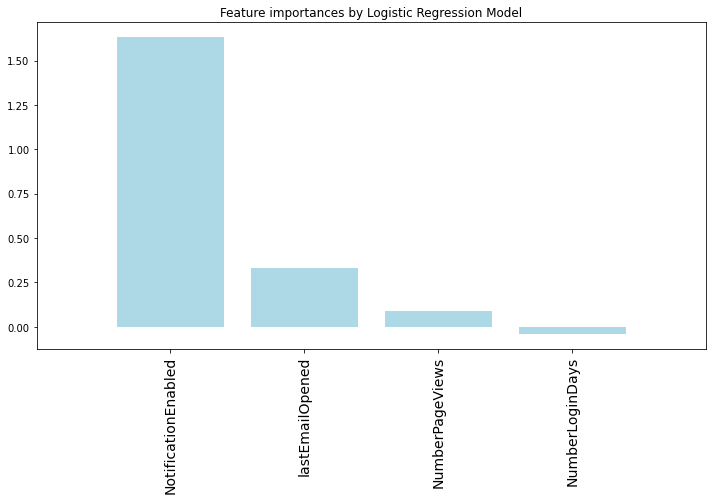

In [75]:
# Feature Importance

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
feat_names = df1.drop('Conversion', axis = 1).drop('ID', axis = 1).columns

indices = np.argsort(importance)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by Logistic Regression Model")
plt.bar(range(len(indices)), importance[indices], color='lightblue',  align="center")
# plt.step(range(len(indices)), np.cumsum(importance[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Q3. A/B Test Case Study (15 mins)
The marketing team is running the promotion campaign on a new platform and would like to see if it’s effective in increasing user conversion. In the testing phase, the users who have seen the Kora ads are considered as the test group, while the others who have seen non-related ads are considered as the control group. The user group label (i.e. test or control), the ads impression as well as the final conversion is provided in the raw dataset.



---



Based on this data, we would like to know:

(i) The performance of the advertisement on the new platform
Hint: you could use hypothesis testing to solve this question, which needs to have the null hypothesis defined in the first place.

Dataset: Q3_data & Q3_variable_definition

(ii) (Bonus) Does the impression (or frequency) impact the conversion? In other words, whether increasing the advertising impression will increase the likelihood of conversion? 


▶ **Solution:**


In [19]:
df2 = pd.read_excel('Sample Quiz Data.xlsx',
              sheet_name='Q3_data') 

In [20]:
df2.head()

,ID,Conversion,Test,Impression
0,1,1,1,1
1,2,1,1,19
2,3,1,1,10
3,4,1,1,66
4,5,1,1,13


In [175]:
tempDF1 = pd.DataFrame(df2['Conversion'].value_counts()).reset_index()
tempDF1.columns = ['Converted', 'Not Converted']

tempDF2 = pd.DataFrame(df2['Test'].value_counts()).reset_index()
tempDF2.columns = ['Converted', 'Not Converted']


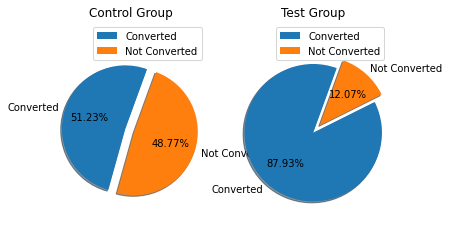

In [176]:
fig, (ax_1, ax_2) = plt.subplots(1, 2)

ax_1.pie(tempDF1['Not Converted'] , explode= explode, labels=labels, autopct= '%1.2f%%',
       shadow=True , startangle = 70)
ax_1.axis('equal')

ax_2.pie(tempDF2['Not Converted'] , explode= explode, labels=labels, autopct= '%1.2f%%',
       shadow=True , startangle = 70)
ax_2.axis('equal')

ax_2.legend()
ax_1.legend()
ax_1.title.set_text('Control Group')
ax_2.title.set_text('Test Group')
 
plt.show()

Let’s plot the distribution of **test** and control group:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


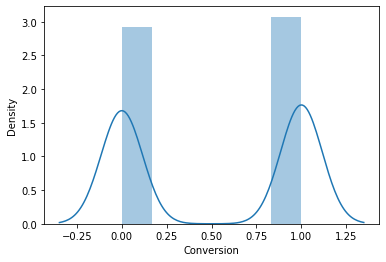

In [21]:
sns.distplot(df2.Conversion)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


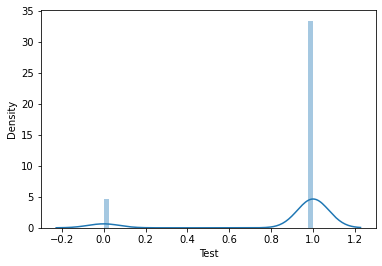

In [22]:
sns.distplot(df2.Test)

In order to figure out whether ads effects our business metrics (or KPI), we will simultaneously be examining how we run a successful A/B testing.

Before we continue, I need to quickly descibe the null hypothesis.

**Null hypothesis**: there is no relationship between Kora ads and our business metrics

In [177]:
import scipy.stats as ss 

t_stat, p_val= ss.ttest_ind(df2.Test , df2.Conversion)
t_stat , p_val

(23.800321937975642, 7.964356642764367e-115)

On the calculation of the t-score, we get the t-score as 23.8 and the p-value is very small.

Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. 

This means that in our A/B testing,  test group is performing better than control group. So our recommendation would be to set up more ads for products.


Let's do a T-test process for dealing with the Q3 (ii) question 

In [178]:
t_stat, p_val= ss.ttest_ind(df2.Impression , df2.Conversion)
t_stat , p_val

(12.485219610940534, 6.544733358194837e-35)

In [179]:
corr2 = df2.corr()
corr2

,ID,Conversion,Test,Impression
ID,1.000000,-0.038337,0.011393,-0.035831
Conversion,-0.038337,1.000000,0.056254,0.130205
Test,0.011393,0.056254,1.000000,-0.004493
Impression,-0.035831,0.130205,-0.004493,1.000000


Text(0.5, 1.0, 'Heatmap of the Correlation Matrix')

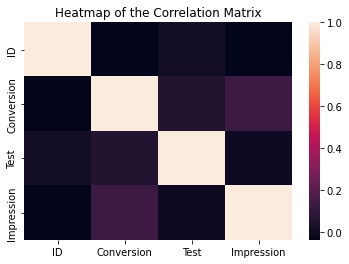

In [180]:
sns.heatmap(corr2)
plt.title('Heatmap of the Correlation Matrix')

So, obviously from the heatmap, we can see that the impression impact the conversion, with a ver small p-value. 